In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/McDonalds_menu_data.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display the first few rows
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                       

In [4]:
print(df.describe())

          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                   

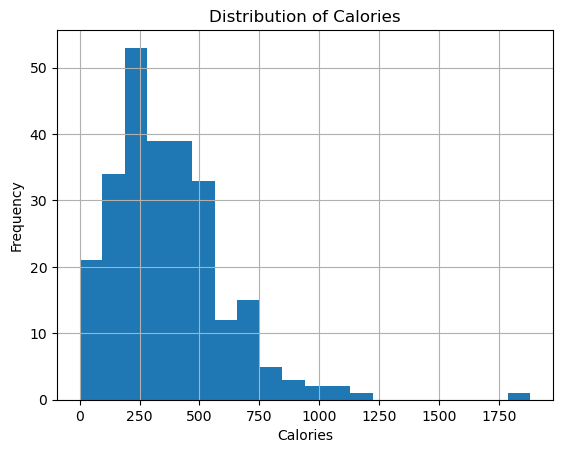

In [15]:
#Plot histograms for numerical columns like Calories, Total Fat, etc.

import matplotlib.pyplot as plt

# Construct the path to the output directory relative to the data directory
output_dir = '../output'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

df['Calories'].hist(bins=20)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')

# Save the plot to the output directory
output_path = os.path.join(output_dir, 'histogram.png')
plt.savefig(output_path)

# Show the plot
plt.show()

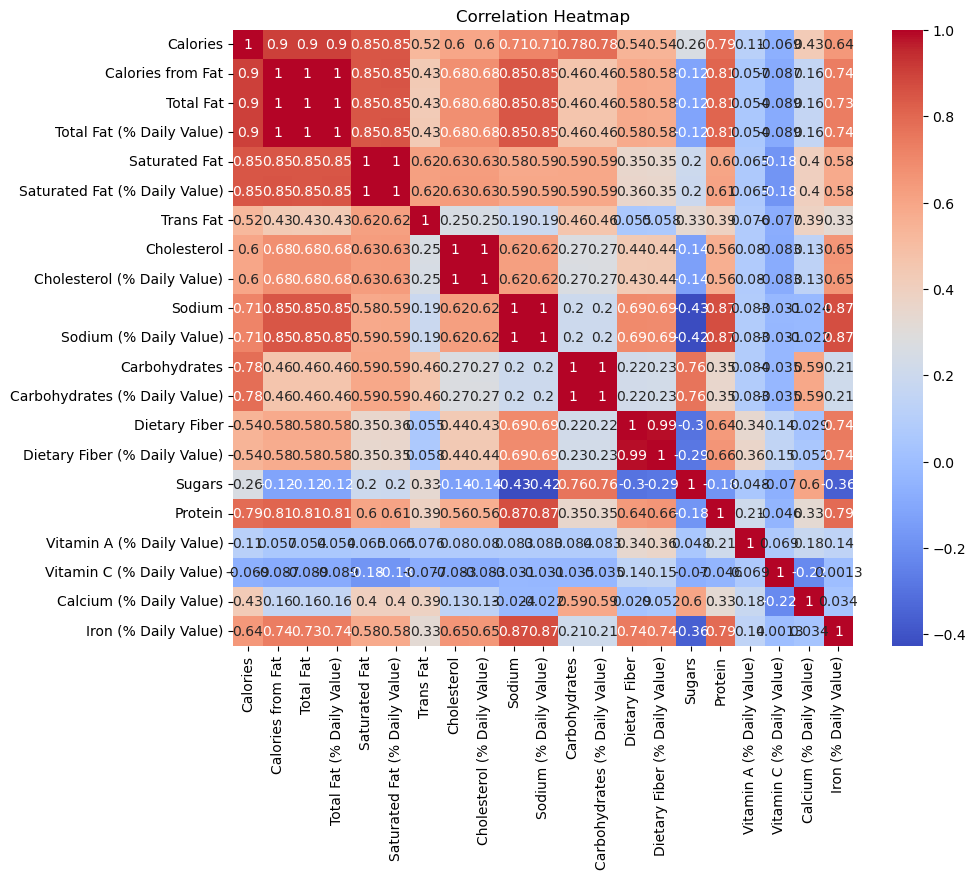

In [16]:
#Correlation analysis:Use a heatmap to visualize correlations between numerical features.

import os
import seaborn as sns

# Construct the path to the output directory relative to the data directory
output_dir = '../output'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

# Save the plot to the output directory
output_path = os.path.join(output_dir, 'heatmap.png')
plt.savefig(output_path)

# Show the plot
plt.show()

In [17]:
# Category analysis: Group by Category to analyze average nutritional values per category.
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
category_means = df.groupby('Category')[numeric_columns].mean()
print(category_means)


                      Calories  Calories from Fat  Total Fat  \
Category                                                       
Beef & Pork         494.000000         224.666667  24.866667   
Beverages           113.703704           0.740741   0.092593   
Breakfast           526.666667         248.928571  27.690476   
Chicken & Fish      552.962963         242.222222  26.962963   
Coffee & Tea        283.894737          71.105263   8.021053   
Desserts            222.142857          64.285714   7.357143   
Salads              270.000000         108.333333  11.750000   
Smoothies & Shakes  531.428571         127.678571  14.125000   
Snacks & Sides      245.769231          94.615385  10.538462   

                    Total Fat (% Daily Value)  Saturated Fat  \
Category                                                       
Beef & Pork                         38.600000      10.466667   
Beverages                            0.148148       0.055556   
Breakfast                           42.

>Feature Engineering

In [18]:
#Handle missing values:
#Fill or drop missing values based on their significance.
df.fillna(0, inplace=True)


In [20]:
#Create new features:
#For example, calculate the percentage of calories from fat:
df['Calories_from_Fat_Percentage'] = (df['Calories from Fat'] / df['Calories']) * 100


In [21]:
#Encode categorical variables:
#Convert Category into numerical format using one-hot encoding.
df = pd.get_dummies(df, columns=['Category'], drop_first=True)


In [22]:
#Save the cleaned and processed dataset for modeling:
df.to_csv('C:/Users/Jason/Projects/McDonalds_Menu_Analysis/data/processed_menu_data.csv', index=False)


>Build a Predictive Model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        12

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



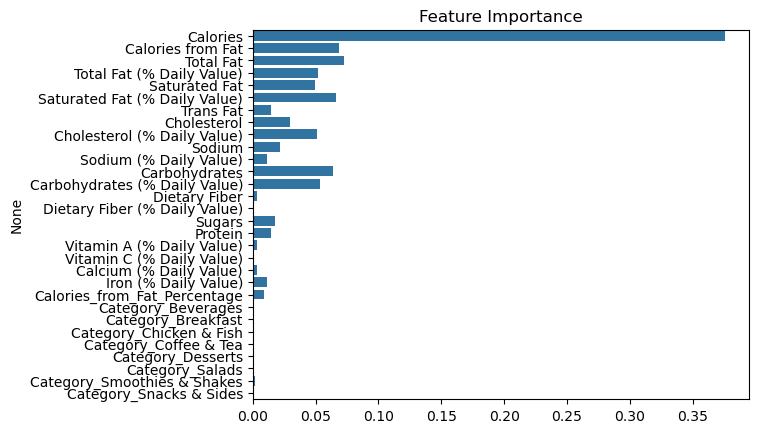

In [24]:
#Define a target variable (e.g., classify items as "High Calorie" or "Low Calorie"):
#Create a binary target based on calorie thresholds:
df['High_Calorie'] = (df['Calories'] > 500).astype(int)

#Split data into training and testing sets:
from sklearn.model_selection import train_test_split

X = df.drop(['High_Calorie', 'Item', 'Serving Size'], axis=1)  # Features (drop target and irrelevant columns)
y = df['High_Calorie']                         # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train a machine learning model (e.g., Random Forest Classifier):
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

#Save feature importance visualization:
feature_importances = model.feature_importances_

# Construct the path to the output directory relative to the data directory
output_dir = '../output'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance")

# Save the plot to the output directory
output_path = os.path.join(output_dir, 'RandomForestClassifier.png')
plt.savefig(output_path)

# Show the plot
plt.show()


